In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils

from image_analysis import get_gram_matrix_distances

figpath = os.path.join(project_root, 'figures_raw')

In [2]:
# load image info
image_set_name = 'images_things64'
image_list_filename = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name))
labels = pd.read_csv(image_list_filename)

# figure out some image/category properties here
n_ims_each = np.sum(np.array(labels['basic_name'])==np.array(labels['basic_name'])[0])
basic_names = np.array(labels['basic_name'][0::n_ims_each])
super_names_long = np.array(labels['super_name'][0::n_ims_each])
basic_inds = np.array(labels['basic_index'][0::n_ims_each])
super_inds_long = np.array(labels['super_index'][0::n_ims_each])
n_basic = len(basic_names)
n_super = len(np.unique(super_names_long))
n_basic_each_super  = int(n_basic/n_super)
super_names = super_names_long[0::n_basic_each_super]
super_cbinds = np.repeat(np.array([0,1]), n_basic_each_super)
super_inds = np.arange(n_super)

# more image properties to organize images
image_type_names = ['orig']
n_image_types = len(image_type_names)
cue_level_names = ['basic','super']

In [14]:
basic_names[super_names_long=='fruit']

array(['grape', 'cherry', 'raspberry', 'apple', 'pear', 'banana',
       'pomegranate', 'coconut'], dtype=object)

In [19]:
b = basic_names[super_names_long=='vegetable']

b[~np.isin(b,['lettuce','pumpkin'])]

array(['pea', 'corn', 'onion', 'cabbage', 'beet', 'asparagus'],
      dtype=object)

In [12]:
n_ims_each

12

#### get all the cosine distances

In [3]:
layer_names = ['pool1','pool2','pool3','pool4']
# layer_names = ['pool1']
n_layers = len(layer_names)

within_b, across_b_within_s, across_b_all, \
                within_s, across_s = [], [], [], [], []

within_b = np.zeros((n_basic, n_layers))
across_b_within_s = np.zeros((n_basic, n_layers))
across_b_all = np.zeros((n_basic, n_layers))
within_s = np.zeros((n_super, n_layers))
across_s = np.zeros((n_super, n_layers))

b_pair_dist = np.zeros((n_basic, n_basic, n_layers))
s_pair_dist = np.zeros((n_super, n_super, n_layers))

for ll in range(n_layers):
        
    wb, acb, acba, ws, acs, bp, sp = \
                    get_gram_matrix_distances.compute_distances_allims(image_set_name = image_set_name, \
                                                        distance_metric='cosine', \
                                                        layers_process = [layer_names[ll]], \
                                                        n_comp_keep = 100, \
                                                        # distance_metric='correlation', \
                                                       )

    within_b[:, ll] = wb
    across_b_within_s[:, ll] = acb
    across_b_all[:, ll] = acba
    within_s[:, ll] = ws
    across_s[:, ll] = acs

    b_pair_dist[:, :, ll] = bp
    s_pair_dist[:, :, ll] = sp
    

    

/user_data/mmhender/featsynth/features/gram_matrices/images_things64_gram_matrices_pool1_pca.npy
/user_data/mmhender/featsynth/features/gram_matrices/images_things64_gram_matrices_pool2_pca.npy
/user_data/mmhender/featsynth/features/gram_matrices/images_things64_gram_matrices_pool3_pca.npy
/user_data/mmhender/featsynth/features/gram_matrices/images_things64_gram_matrices_pool4_pca.npy


In [4]:
np.mean(np.mean(b_pair_dist, axis=0), axis=0)

array([0.99935353, 0.9984606 , 0.99892087, 0.99626869])

In [5]:
# ll = 0;

# for si in [0]:
    
for si in range(8):
        
    print('\n%s:\n'%super_names[si])
    
    bnames_here = basic_names[super_inds_long==si]

    # vals = b_pair_dist[:,:,ll]
    vals = np.mean(b_pair_dist, axis=2)

    vals = vals[super_inds_long==si, :][:, super_inds_long==si]
    
    # plt.figure()
    # plt.pcolormesh(vals)
    # plt.xticks(np.arange(8)+0.5, bnames_here, rotation=90)
    # plt.yticks(np.arange(8)+0.5, bnames_here)

    
    
    vals = np.tril(vals, -1)
    
    # plt.figure()
    # plt.pcolormesh(vals)
    
    # sorted_desc = np.flipud(np.sort(np.unique(vals.ravel())))
    # sorted_desc
    
    # most_distinct_pair = np.where(vals==sorted_desc[0])
    # most_distinct_pair
    
    sorted_asc = np.sort(np.unique(vals.ravel()))
    sorted_asc = sorted_asc[sorted_asc!=0]
    
    for xx in [0,1,2,3,4]:
    
        # print(sorted_asc[xx])
        least_distinct_pair = np.where(vals==sorted_asc[xx])
        
        bi1 = least_distinct_pair[0][0]
        bi2 = least_distinct_pair[1][0]
    
        
        print('%s/%s: dist = %.4f'%(bnames_here[bi1], bnames_here[bi2], sorted_asc[xx]))
    
        for bi in [bi1, bi2]:
    
    
            dist_other_categs = np.unique(np.concatenate([vals[bi,:], vals[:,bi]]))
            dist_other_categs = dist_other_categs[dist_other_categs!=0]
    
            
            print('   %s/all others: median dist = %.4f'%(bnames_here[bi], np.median(dist_other_categs)))
    
            # print(np.mean(dist_other_categs))
    # 
            # mean_conf_this_categ = 


insect:

mosquito/ant: dist = 0.8879
   mosquito/all others: median dist = 0.9648
   ant/all others: median dist = 0.9582
ant/beetle: dist = 0.9216
   ant/all others: median dist = 0.9582
   beetle/all others: median dist = 0.9834
moth/beetle: dist = 0.9448
   moth/all others: median dist = 0.9885
   beetle/all others: median dist = 0.9834
ant/bee: dist = 0.9494
   ant/all others: median dist = 0.9582
   bee/all others: median dist = 0.9864
caterpillar/grasshopper: dist = 0.9494
   caterpillar/all others: median dist = 0.9834
   grasshopper/all others: median dist = 0.9712

mammal:

cow/horse: dist = 0.8391
   cow/all others: median dist = 0.9460
   horse/all others: median dist = 0.9582
rabbit/lion: dist = 0.8585
   rabbit/all others: median dist = 0.9562
   lion/all others: median dist = 0.9089
pig/elephant: dist = 0.8843
   pig/all others: median dist = 0.9383
   elephant/all others: median dist = 0.9210
squirrel/lion: dist = 0.8847
   squirrel/all others: median dist = 0.9621
   l

In [6]:
exclude_pairs = []
sets_of_6 = []
for ii in np.arange(0, 8):
    for jj in np.arange(ii+1, 8):
        exclude_pairs += [[ii, jj]]
        vals = np.arange(8)
        sets_of_6 += [vals[~np.isin(vals, [ii,jj])]]

exclude_pairs = np.array(exclude_pairs)
sets_of_6 = np.array(sets_of_6)
exclude_pairs.shape, sets_of_6.shape

((28, 2), (28, 6))


insect:

['beetle' 'bee' 'butterfly' 'grasshopper' 'caterpillar' 'moth']

mammal:

['dog' 'horse' 'squirrel' 'cow' 'pig' 'rabbit']

vegetable:

['corn' 'pumpkin' 'onion' 'lettuce' 'beet' 'asparagus']

fruit:

['grape' 'cherry' 'raspberry' 'apple' 'banana' 'coconut']

tool:

['pencil' 'knife' 'broom' 'hammer' 'shovel' 'scissors']

musical instrument:

['bell' 'guitar' 'piano' 'violin' 'trumpet' 'cymbal']

furniture:

['table' 'bench' 'couch' 'television' 'bed' 'lamp']

vehicle:

['train' 'airplane' 'car' 'bus' 'motorcycle' 'canoe']


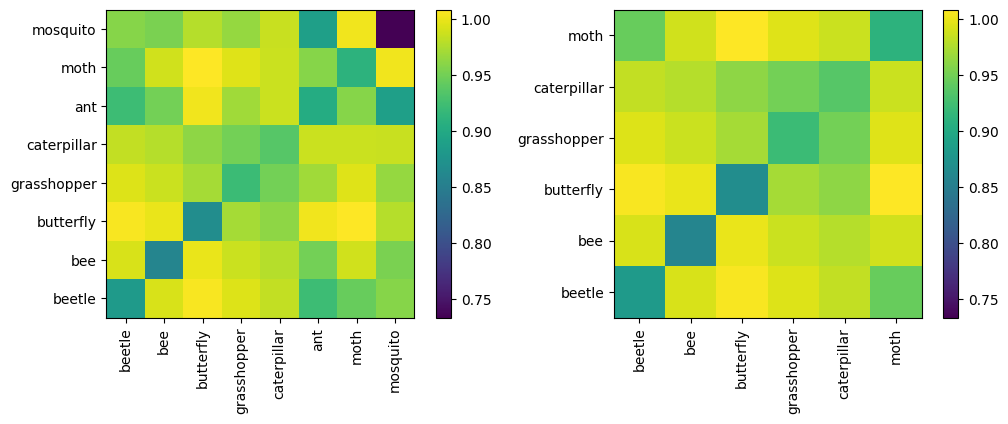

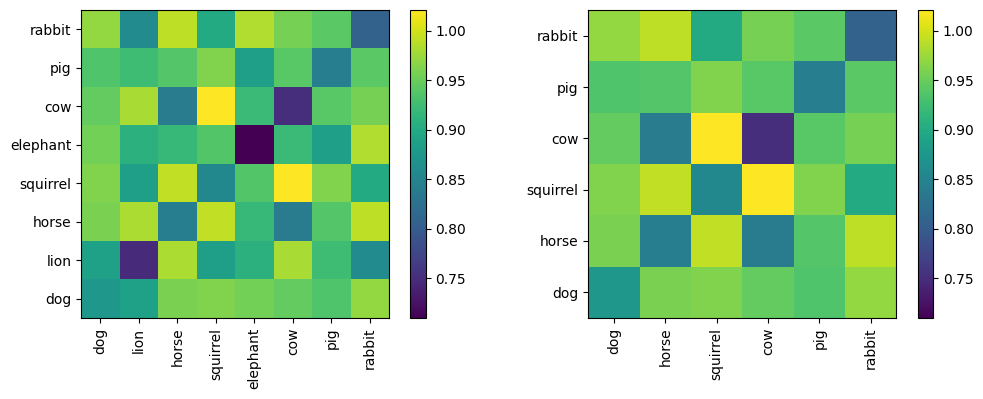

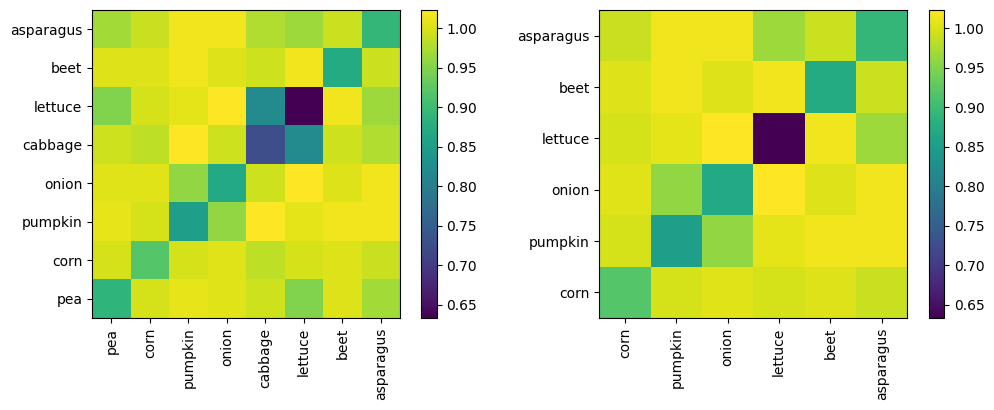

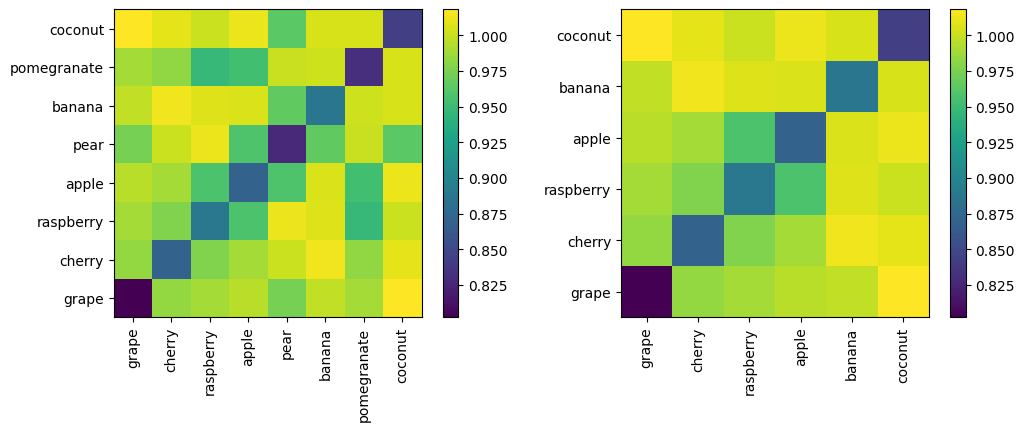

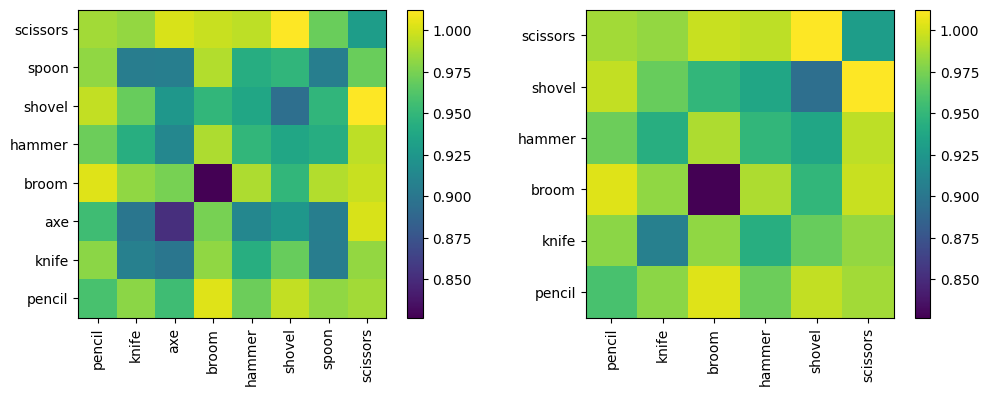

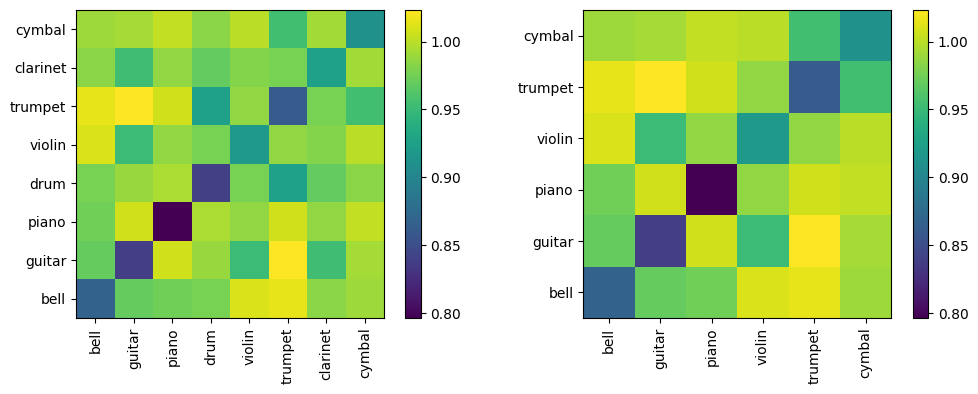

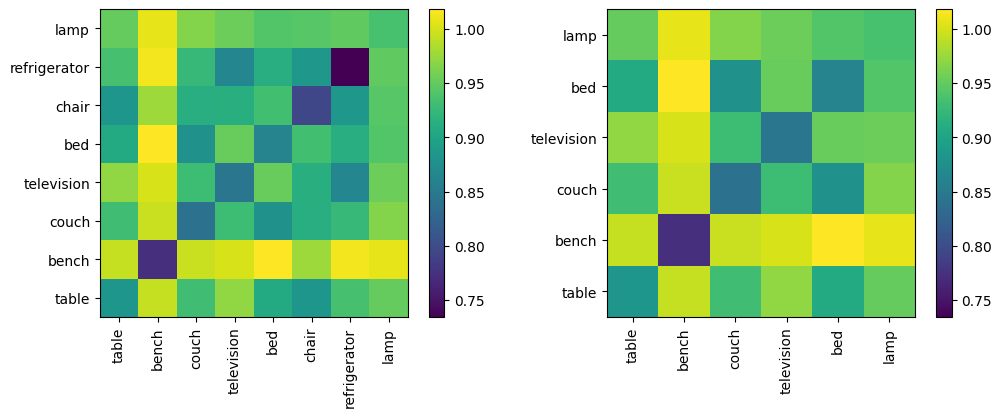

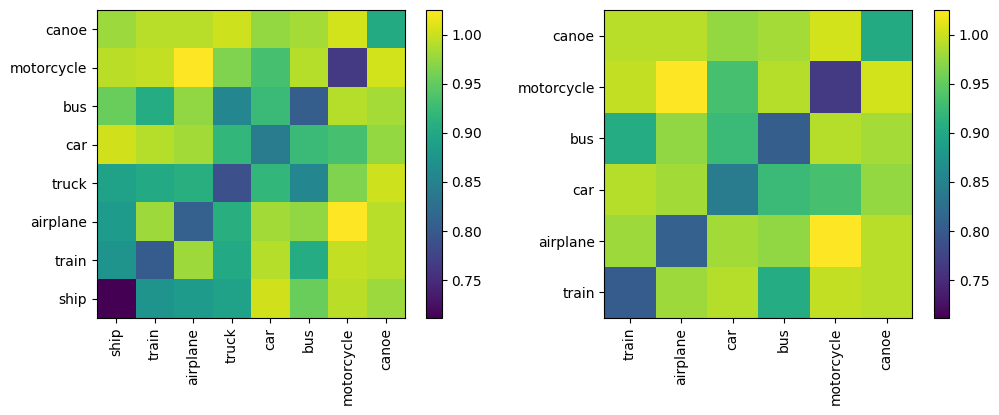

In [7]:

basic_use_6 = dict([])
# for si in [0]:
    
for si in range(8):
        
    print('\n%s:\n'%super_names[si])
    
    bnames_here = basic_names[super_inds_long==si]

    # vals = b_pair_dist[:,:,ll]
    vals = np.mean(b_pair_dist, axis=2)

    vals = vals[super_inds_long==si, :][:, super_inds_long==si]

    mean_tri = np.zeros((sets_of_6.shape[0],))
    
    # for xx in [0]:
    for xx in range(sets_of_6.shape[0]):

        inds = sets_of_6[xx,:]
        vals_set = vals[inds,:][:,inds]
        vals_tri = np.tril(vals_set, -1)
        vals_tri = vals_tri[vals_tri!=0]

        mean_tri[xx] = np.mean(vals_tri)        
        # print(vals_tri)
    
    
    best_set = sets_of_6[np.argmax(mean_tri),:]
    
    print(bnames_here[best_set])

    basic_use_6[super_names[si]] = list(bnames_here[best_set])
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1,2,1)
    
    minval = np.min(vals)
    maxval = np.max(vals)
    plt.pcolormesh(vals, vmin=minval, vmax=maxval)
    plt.axis('square')
    plt.xticks(np.arange(8)+0.5, bnames_here, rotation=90);
    plt.yticks(np.arange(8)+0.5, bnames_here);
    plt.colorbar()
    
    
    plt.subplot(1,2,2)
    
    plt.pcolormesh(vals[best_set,:][:,best_set], vmin=minval, vmax=maxval)
    plt.axis('square')
    plt.xticks(np.arange(6)+0.5, bnames_here[best_set], rotation=90);
    plt.yticks(np.arange(6)+0.5, bnames_here[best_set]);
    plt.colorbar()


In [130]:
basic_use_6

{'insect': ['beetle',
  'bee',
  'butterfly',
  'grasshopper',
  'caterpillar',
  'moth'],
 'mammal': ['dog', 'horse', 'squirrel', 'cow', 'pig', 'rabbit'],
 'vegetable': ['corn', 'pumpkin', 'onion', 'lettuce', 'beet', 'asparagus'],
 'fruit': ['grape', 'cherry', 'raspberry', 'apple', 'banana', 'coconut'],
 'tool': ['pencil', 'knife', 'broom', 'hammer', 'shovel', 'scissors'],
 'musical instrument': ['bell',
  'guitar',
  'piano',
  'violin',
  'trumpet',
  'cymbal'],
 'furniture': ['table', 'bench', 'couch', 'television', 'bed', 'lamp'],
 'vehicle': ['train', 'airplane', 'car', 'bus', 'motorcycle', 'canoe']}

In [131]:
basic_use_6 = {'insect': ['beetle','bee','butterfly','grasshopper','caterpillar','moth'],
 'mammal': ['dog', 'horse', 'squirrel', 'cow', 'pig', 'rabbit'],
 'vegetable': ['corn', 'pumpkin', 'onion', 'lettuce', 'beet', 'asparagus'],
 'fruit': ['grape', 'cherry', 'raspberry', 'apple', 'banana', 'coconut'],
 'tool': ['pencil', 'knife', 'broom', 'hammer', 'shovel', 'scissors'],
 'musical instrument': ['bell','guitar','piano','violin','trumpet','cymbal'],
 'furniture': ['table', 'bench', 'couch', 'television', 'bed', 'lamp'],
 'vehicle': ['train', 'airplane', 'car', 'bus', 'motorcycle', 'canoe']}

In [57]:
vals[:,bi]

array([0.        , 0.99998455, 0.98798505, 0.9897413 , 0.95690342,
       0.95123085, 0.965735  , 0.99552916])

In [12]:

basic_use_6 = dict([])
# for si in [0]:
    
for si in range(8):
        
    print('\n%s:\n'%super_names[si])
    
    bnames_here = basic_names[super_inds_long==si]

    # vals = b_pair_dist[:,:,ll]
    vals = np.mean(b_pair_dist, axis=2)

    vals = vals[super_inds_long==si, :][:, super_inds_long==si]

    mean_tri = np.zeros((sets_of_6.shape[0],))
    
    # for xx in [0]:
    for xx in range(sets_of_6.shape[0]):

        inds = sets_of_6[xx,:]
        vals_set = vals[inds,:][:,inds]
        vals_tri = np.tril(vals_set, -1)
        vals_tri = vals_tri[vals_tri!=0]

        mean_tri[xx] = np.mean(vals_tri)        
        # print(vals_tri)
    

    order = np.flipud(np.argsort(mean_tri))

    for oo in order[0:5]:

        print(mean_tri[oo])
        
        best_set = sets_of_6[oo,:]
        
        print(bnames_here[best_set])
        print(bnames_here[~np.isin(np.arange(8), best_set)])
    
        basic_use_6[super_names[si]] = list(bnames_here[best_set])
        


insect:

0.9826973165703993
['beetle' 'bee' 'butterfly' 'grasshopper' 'caterpillar' 'moth']
['ant' 'mosquito']
0.9825786551477906
['beetle' 'bee' 'butterfly' 'grasshopper' 'moth' 'mosquito']
['caterpillar' 'ant']
0.9814986941654035
['beetle' 'bee' 'butterfly' 'caterpillar' 'moth' 'mosquito']
['grasshopper' 'ant']
0.9803395328300161
['bee' 'butterfly' 'grasshopper' 'caterpillar' 'moth' 'mosquito']
['beetle' 'ant']
0.9791443215000019
['bee' 'butterfly' 'grasshopper' 'caterpillar' 'ant' 'moth']
['beetle' 'mosquito']

mammal:

0.9500775386544197
['dog' 'horse' 'squirrel' 'cow' 'pig' 'rabbit']
['lion' 'elephant']
0.9498796903997783
['dog' 'horse' 'squirrel' 'elephant' 'cow' 'rabbit']
['lion' 'pig']
0.9484858175490906
['dog' 'horse' 'squirrel' 'elephant' 'pig' 'rabbit']
['lion' 'cow']
0.9477399090705535
['dog' 'squirrel' 'elephant' 'cow' 'pig' 'rabbit']
['lion' 'horse']
0.9435851597325674
['dog' 'lion' 'horse' 'squirrel' 'cow' 'pig']
['elephant' 'rabbit']

vegetable:

1.000150834551009
['co

In [19]:
b = basic_names[super_names_long=='vegetable']

b[~np.isin(b,['lettuce','pumpkin'])]

array(['pea', 'corn', 'onion', 'cabbage', 'beet', 'asparagus'],
      dtype=object)

In [31]:
si  = 2;

print('\n%s:\n'%super_names[si])

bnames_here = basic_names[super_inds_long==si]

# vals = b_pair_dist[:,:,ll]
vals = np.mean(b_pair_dist, axis=2)

vals = vals[super_inds_long==si, :][:, super_inds_long==si]

mean_tri = np.zeros((sets_of_6.shape[0],))

# for xx in [0]:
for xx in range(sets_of_6.shape[0]):

    inds = sets_of_6[xx,:]
    vals_set = vals[inds,:][:,inds]
    vals_tri = np.tril(vals_set, -1)
    vals_tri = vals_tri[vals_tri!=0]

    mean_tri[xx] = np.mean(vals_tri)        
    # print(vals_tri)

order = np.flipud(np.argsort(mean_tri))



vegetable:



In [26]:
b = basic_names[super_names_long=='vegetable']

np.where([~np.any(np.isin(bset, ['lettuce','pumpkin'])) for bset in b[sets_of_6]])

(array([15]),)

In [28]:
mean_tri[15]

0.9949465929847773

In [33]:
np.where(order==15)

(array([11]),)

In [34]:
mean_tri.shape

(28,)

In [135]:
np.sort(mean_tri)

array([0.92943412, 0.93796806, 0.93952972, 0.93956816, 0.94294237,
       0.9466186 , 0.94807414, 0.9494558 , 0.94967458, 0.95113569,
       0.95182592, 0.95215007, 0.95538808, 0.95784148, 0.95878558,
       0.95881733, 0.95978227, 0.96010103, 0.96082892, 0.96188044,
       0.96334774, 0.96462428, 0.96600738, 0.9678083 , 0.97064354,
       0.97252014, 0.97292947, 0.97588843])

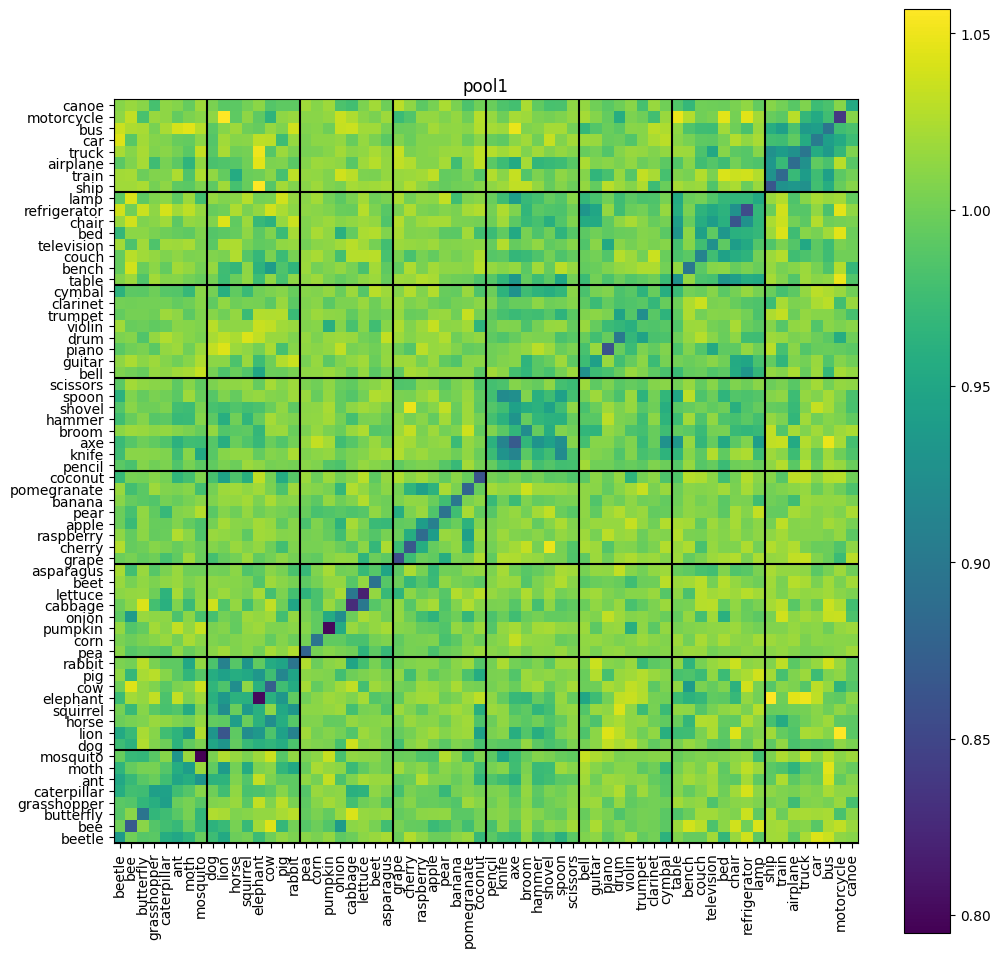

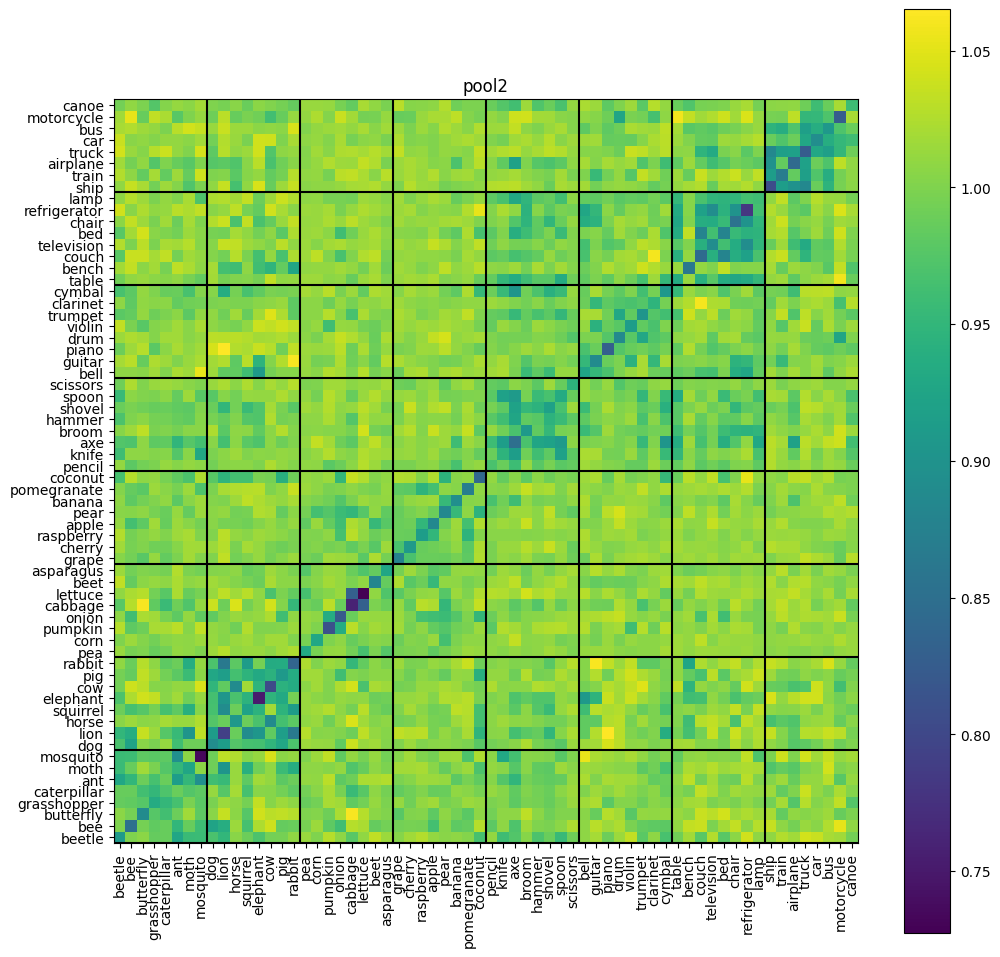

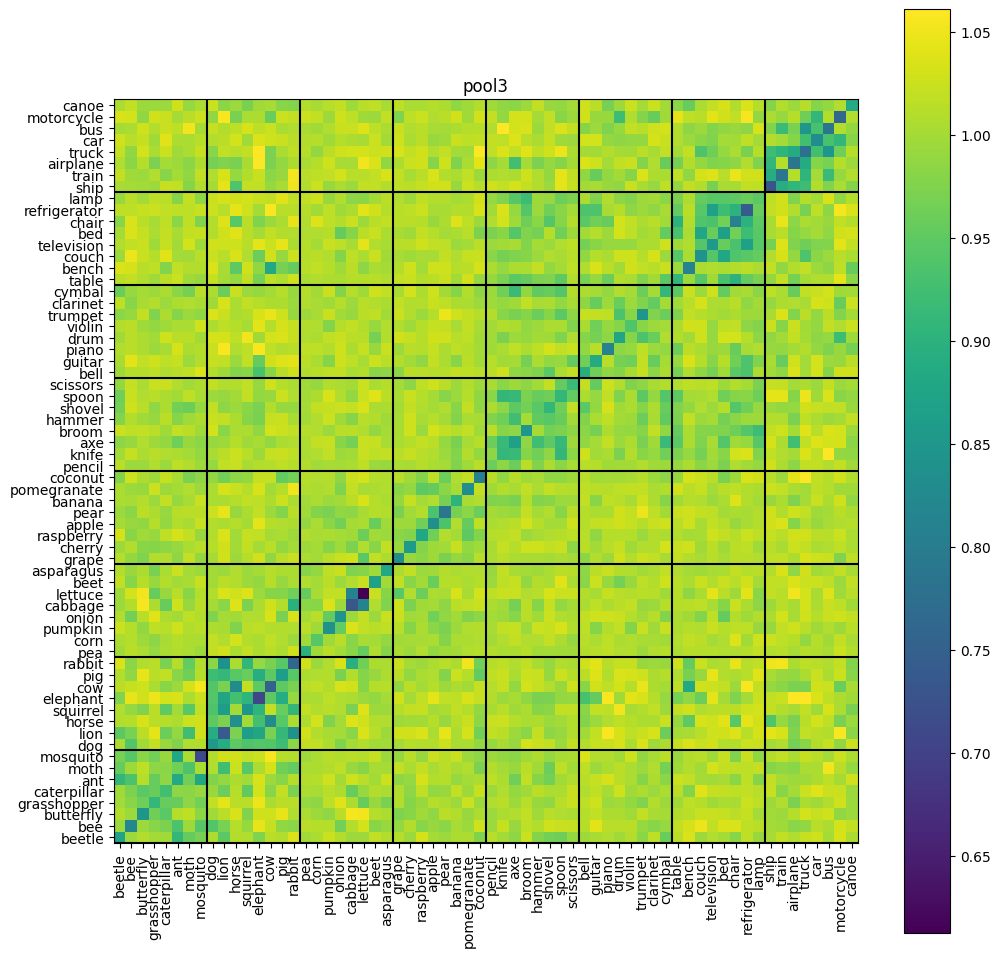

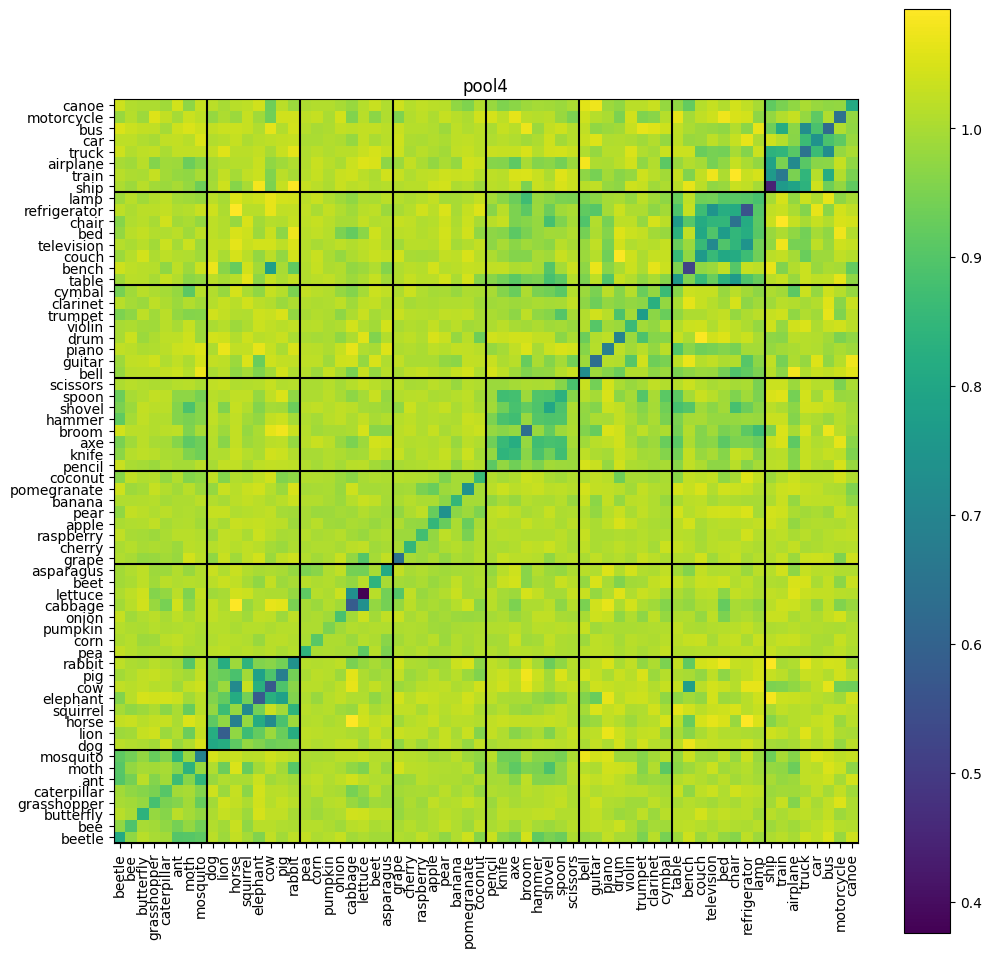

In [9]:
for ll in range(n_layers):
    
    
    d = b_pair_dist[:,:,ll]
    
    plt.figure(figsize=(12, 12))
    plt.pcolormesh(d, \
                   # vmin=0.37, vmax=1.10, \
                  )
    plt.xticks(np.arange(n_basic)+0.5, basic_names, rotation=90)
    plt.yticks(np.arange(n_basic)+0.5, basic_names)
    
    for si in range(n_super):
        plt.axhline(si*n_basic_each_super, color='k')
        plt.axvline(si*n_basic_each_super, color='k')
    
    plt.axis('square')
    plt.colorbar()

    plt.title(layer_names[ll])

In [35]:
basic_use_6 = {'insect': ['beetle','bee','butterfly','grasshopper','caterpillar','moth'],
         'mammal': ['dog', 'squirrel', 'elephant', 'cow', 'pig', 'rabbit'],
         'vegetable': ['pea', 'corn', 'onion', 'cabbage', 'beet', 'asparagus'],
         'fruit': ['grape', 'cherry', 'raspberry', 'pear', 'banana', 'coconut'],
         'tool': ['pencil', 'knife', 'broom', 'hammer', 'shovel', 'scissors'],
         'musical instrument': ['bell', 'piano', 'violin', 'trumpet', 'clarinet', 'cymbal'],
         'furniture': ['table', 'bench', 'couch', 'television', 'bed', 'lamp'],
         'vehicle': ['train', 'airplane', 'car', 'bus', 'motorcycle', 'canoe']}


In [38]:
for sname in super_names:
    
    print(sname)
    print(basic_use_6[sname])

    b = basic_names[super_names_long==sname]

    print(b[~np.isin(b, basic_use_6[sname])])

insect
['beetle', 'bee', 'butterfly', 'grasshopper', 'caterpillar', 'moth']
['ant' 'mosquito']
mammal
['dog', 'squirrel', 'elephant', 'cow', 'pig', 'rabbit']
['lion' 'horse']
vegetable
['pea', 'corn', 'onion', 'cabbage', 'beet', 'asparagus']
['pumpkin' 'lettuce']
fruit
['grape', 'cherry', 'raspberry', 'pear', 'banana', 'coconut']
['apple' 'pomegranate']
tool
['pencil', 'knife', 'broom', 'hammer', 'shovel', 'scissors']
['axe' 'spoon']
musical instrument
['bell', 'piano', 'violin', 'trumpet', 'clarinet', 'cymbal']
['guitar' 'drum']
furniture
['table', 'bench', 'couch', 'television', 'bed', 'lamp']
['chair' 'refrigerator']
vehicle
['train', 'airplane', 'car', 'bus', 'motorcycle', 'canoe']
['ship' 'truck']


In [40]:
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'


fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
basic_names = list(info['binfo'].keys())
super_names = list(info['sinfo'].keys())


In [42]:
for sname in super_names:
    
    print(sname)
    print(info['sinfo'][sname]['basic_names'])


insect
['beetle', 'bee', 'butterfly', 'grasshopper', 'caterpillar', 'ant', 'moth', 'mosquito']
mammal
['dog', 'lion', 'horse', 'squirrel', 'elephant', 'cow', 'pig', 'rabbit']
vegetable
['pea', 'corn', 'pumpkin', 'onion', 'cabbage', 'lettuce', 'beet', 'asparagus']
fruit
['grape', 'cherry', 'raspberry', 'apple', 'pear', 'banana', 'pomegranate', 'coconut']
tool
['pencil', 'knife', 'axe', 'broom', 'hammer', 'shovel', 'spoon', 'scissors']
musical instrument
['bell', 'guitar', 'piano', 'drum', 'violin', 'trumpet', 'clarinet', 'cymbal']
furniture
['table', 'bench', 'couch', 'television', 'bed', 'chair', 'refrigerator', 'lamp']
vehicle
['ship', 'train', 'airplane', 'truck', 'car', 'bus', 'motorcycle', 'canoe']
